In [126]:
import numpy as np
from scipy import optimize
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
%matplotlib inline

# Q2. Finding state value for policy Pi

In [134]:
# Constants for Q2 and Q4
ROWS = 5
COLS = 5
cellA = (0,1)
cellB = (0,3)
cellA2 = (4,1)
cellB2 = (2,3)
gamma = .9

In [135]:
#To determine if cell is corner
def iscorner(i,j):
    if((i==0 or i==ROWS-1) and (j==0 or j==COLS-1)):
        return True
    return False
#To determine if cell is valid
def isvalid(i,j):
    return (i in list(range(ROWS))) and (j in list(range(COLS)))
#To determine if cell is at edge
def isedge(i,j):
    if(i==ROWS-1 or i==0 or j==COLS-1 or j==0):
        return True
    return False
#Returns a list of neighbours of cell (i,j)
def findneighbours(i,j):
    neighbour = []
    if(isvalid(i+1,j)):
        neighbour.append((i+1,j))
    if(isvalid(i-1,j)):
        neighbour.append((i-1,j))
    if(isvalid(i,j+1)):
        neighbour.append((i,j+1))
    if(isvalid(i,j-1)):
        neighbour.append((i,j-1))
    return neighbour

In [136]:
# Preparing matrices A and B for system of equations Ax=B
A = np.zeros((25,25))
B = np.zeros(25)
eqn = 0
# Iterating over all cells in the grid and adding their equations to matrix A
for x in range(ROWS):
    for y in range(COLS):
        if((x,y)==cellA):
            A[eqn][COLS*x+y] = 1
            A[eqn][COLS*cellA2[0]+cellA2[1]] = -gamma
            B[eqn] = 10
            eqn+=1
        elif((x,y)==cellB):
            A[eqn][COLS*x+y] = 1
            A[eqn][COLS*cellB2[0] + cellB2[1]] = -gamma
            B[eqn] = 5
            eqn+=1
        else:
            if(iscorner(x,y)):
                neighbours = findneighbours(x,y)
                for cell in neighbours:
                    A[eqn][COLS*cell[0]+cell[1]] = -gamma/4
                A[eqn][COLS*x+y] = (1-gamma/2)
                B[eqn] = -.5
            elif(isedge(x,y)):
                neighbours = findneighbours(x,y)
                for cell in neighbours:
                    A[eqn][COLS*cell[0]+cell[1]] = -gamma/4
                A[eqn][COLS*x+y] = (1-gamma/4)
                B[eqn] = -.25
            else:
                neighbours = findneighbours(x,y)
                for cell in neighbours:
                    A[eqn][COLS*cell[0]+cell[1]] = -gamma/4
                A[eqn][COLS*x+y] = 1
                B[eqn] = 0
            eqn+=1


In [137]:
x = np.dot(np.linalg.inv(A),B)

In [139]:
np.round(np.reshape(x,(5,5)),1)

array([[ 3.3,  8.8,  4.4,  5.3,  1.5],
       [ 1.5,  3. ,  2.3,  1.9,  0.5],
       [ 0.1,  0.7,  0.7,  0.4, -0.4],
       [-1. , -0.4, -0.4, -0.6, -1.2],
       [-1.9, -1.3, -1.2, -1.4, -2. ]])

# Q4. Finding state value for optimal policy

In [8]:
A = np.zeros((100,25))
B = np.zeros(100)
eqn = 0
# Iterating over all cells in the grid and adding the inequalities to matrix A

for x in range(ROWS):
    for y in range(COLS):
        if((x,y)==cellA):
            #Adding equations for all 4 directions in the matrix
            for i in range(4):  
                A[eqn][COLS*x+y] = 1
                A[eqn][COLS*cellA2[0]+cellA2[1]] = -gamma
                B[eqn] = 10
                eqn+=1 
        elif((x,y)==cellB):
            #Adding equations for all 4 directions in the matrix
            for i in range(4):  
                A[eqn][COLS*x+y] = 1
                A[eqn][COLS*cellB2[0]+cellB2[1]] = -gamma
                B[eqn] = 5
                eqn+=1
        else:
            #Adding equations for all 4 directions in the matrix
            #Up
            if(isvalid(x-1,y)):
                A[eqn][COLS*x+y] = 1
                A[eqn][COLS*(x-1)+y] = -gamma
                B[eqn] = 0
            else:
                A[eqn][COLS*x+y] = 1-gamma
                B[eqn] = -1
            eqn+=1
            #Down
            if(isvalid(x+1,y)):
                A[eqn][COLS*x+y] = 1
                A[eqn][COLS*(x+1)+y] = -gamma
                B[eqn] = 0
            else:
                A[eqn][COLS*x+y] = 1-gamma
                B[eqn] = -1
            eqn+=1
            #Left
            if(isvalid(x,y-1)):
                A[eqn][COLS*x+y] = 1
                A[eqn][COLS*x+y-1] = -gamma
                B[eqn] = 0
            else:
                A[eqn][COLS*x+y] = 1-gamma
                B[eqn] = -1
            eqn+=1
            #Right
            if(isvalid(x,y+1)):
                A[eqn][COLS*x+y] = 1
                A[eqn][COLS*x+y+1] = -gamma
                B[eqn] = 0
            else:
                A[eqn][COLS*x+y] = 1-gamma
                B[eqn] = -1
            eqn+=1
c = np.ones(ROWS*COLS)
# Solving Ax>=B
optimal_values = optimize.linprog(c,-A,-B).x
optimal_values = np.reshape(optimal_values,(ROWS,COLS))
optimal_values = np.round(optimal_values,1)
np.save('q4_A',A)
np.save('q4_B',B)
print("V*")
print(optimal_values)
print("Pi*")
direction_map = {0:'up',1:'down',2:'left',3:'right'}
for x in range(ROWS):
    for y in range(COLS): 
        if((x,y)==cellA or (x,y)==cellB):
            print(str((x,y)) + ": "+"up | down | left | right")
        else:
            valids = [isvalid(x-1,y),isvalid(x+1,y),isvalid(x,y-1),isvalid(x,y+1)]
            vals = [] 
            if(isvalid(x-1,y)):
                val = optimal_values[x-1][y]
                vals.append(val)
            else:
                vals.append(-1)
            if(isvalid(x+1,y)):
                val = optimal_values[x+1][y]
                vals.append(val)
            else:
                vals.append(-1)
            if(isvalid(x,y-1)):
                val = optimal_values[x][y-1]
                vals.append(val)
            else:
                vals.append(-1)
            if(isvalid(x,y+1)):
                val = optimal_values[x][y+1]
                vals.append(val)
            else:
                vals.append(-1)
            vals = np.array(vals)
            directions = np.where(vals==np.max(vals))[0]
            print(str((x,y))+":",end=" ")
            for direction in directions:
                print(direction_map[direction]+" |",end="")
            print()

                
            

V*
[[22.  24.4 22.  19.4 17.5]
 [19.8 22.  19.8 17.8 16. ]
 [17.8 19.8 17.8 16.  14.4]
 [16.  17.8 16.  14.4 13. ]
 [14.4 16.  14.4 13.  11.7]]
Pi*
(0, 0): right |
(0, 1): up | down | left | right
(0, 2): left |
(0, 3): up | down | left | right
(0, 4): left |
(1, 0): up |right |
(1, 1): up |
(1, 2): up |left |
(1, 3): left |
(1, 4): left |
(2, 0): up |right |
(2, 1): up |
(2, 2): up |left |
(2, 3): up |left |
(2, 4): up |left |
(3, 0): up |right |
(3, 1): up |
(3, 2): up |left |
(3, 3): up |left |
(3, 4): up |left |
(4, 0): up |right |
(4, 1): up |
(4, 2): up |left |
(4, 3): up |left |
(4, 4): up |left |


# Q6. Policy evaluation and iteration

## a) Policy Iteration

In [146]:
#Initializing constants

ROWS = 4
COLS = 4
terminal_state = [(0,0),(ROWS-1,COLS-1)]
v_pi = np.zeros((ROWS,COLS))
theta = .01
pi = np.zeros((ROWS,COLS,4))

#Initially policy is taken as random. All movements are equiprobable
#pi[row][col] = [up,down,left,right]

for row in range(ROWS):
    for col in range(COLS):
        pi[row][col] = [.25,.25,.25,.25]
        
while(1):
# Policy evaluation 
    print("Evaluating Policy ")
    while(1):
        delta = 0
        for x in range(ROWS):
            for y in range(COLS):
                if((x,y) not in terminal_state):
                    #up
                    value = 0
                    if(isvalid(x-1,y)):
                        value+=pi[x][y][0]*(-1 + v_pi[x-1][y])
                    else:
                        value+=pi[x][y][0]*(-1 + v_pi[x][y]) 
                    #down
                    if(isvalid(x+1,y)):
                        value+=pi[x][y][1]*(-1 + v_pi[x+1][y])
                    else:
                        value+=pi[x][y][1]*(-1 + v_pi[x][y])
                    #left
                    if(isvalid(x,y-1)):
                        value+=pi[x][y][2]*(-1 + v_pi[x][y-1])
                    else:
                        value+=pi[x][y][2]*(-1 + v_pi[x][y])
                    #right
                    if(isvalid(x,y+1)):
                        value+=pi[x][y][3]*(-1 + v_pi[x][y+1])
                    else:
                        value+=pi[x][y][3]*(-1 + v_pi[x][y])
                    delta = max(delta,abs(v_pi[x][y] - value))
                    v_pi[x][y] = value
        print('delta : '+str(delta))
        if(delta<theta):
            break
    
    
    v_pi = np.round(v_pi,2)
    print(v_pi)
#Policy Iteration
    print("Improving policy")
    stable = True
    for x in range(ROWS):
        for y in range(COLS):
            if((x,y) not in terminal_state):
                #up
                up,down,left,right = 0,0,0,0
                if(isvalid(x-1,y)):
                    up=(-1 + v_pi[x-1][y])
                else:
                    up=(-1 + v_pi[x][y]) 
                #down
                if(isvalid(x+1,y)):
                    down=(-1 + v_pi[x+1][y])
                else:
                    down=(-1 + v_pi[x][y])
                #left
                if(isvalid(x,y-1)):
                    left=(-1 + v_pi[x][y-1])
                else:
                    left=(-1 + v_pi[x][y])
                #right
                if(isvalid(x,y+1)):
                    right=(-1 + v_pi[x][y+1])
                else:
                    right=(-1 + v_pi[x][y])
                s_a_value = np.array([up,down,left,right])
                max_a = np.where(s_a_value == np.max(s_a_value))[0]
                new_pi = np.zeros(4)
                new_pi[max_a] = 1/len(max_a)
#                 print(new_pi)
                if((new_pi==pi[x][y]).all()==False):
#                     print('yes')
                    stable=False
                    pi[x][y] = new_pi 
    if(stable==True):
        optimal_policy = []
        direction_map = {0:'u',1:'d',2:'l',3:'r'}
        for x in range(ROWS):
            for y in range(COLS):
                if((x,y) in terminal_state):
                    optimal_policy.append('T')
                if((x,y) not in terminal_state):
                    directions = np.where(pi[x][y]!=0)[0]
                    ans = ''
                    for direction in directions:
                        ans += direction_map[direction]
                    optimal_policy.append(ans)
        optimal_policy = np.reshape(np.array(optimal_policy),(ROWS,COLS))
        print(optimal_policy)
                        
        break

print(np.round(v_pi,2))

Evaluating Policy 
delta : 1.8984375
delta : 1.724609375
delta : 1.472412109375
delta : 1.4061737060546875
delta : 1.3317079544067383
delta : 1.2421786189079285
delta : 1.1491830237209797
delta : 1.0584387693088502
delta : 0.9725181825488107
delta : 0.8924059502996897
delta : 0.8183112404493045
delta : 0.7500779695562692
delta : 0.6873890613115314
delta : 0.6298669391432661
delta : 0.5771221272796652
delta : 0.5287760186094594
delta : 0.48447085001008716
delta : 0.4438733987055308
delta : 0.4066756472311397
delta : 0.372594031842965
delta : 0.3413680735003908
delta : 0.3127587833753509
delta : 0.2865470318891994
delta : 0.26253196938627354
delta : 0.24052953664261167
delta : 0.22037107894401586
delta : 0.2019020656849193
delta : 0.18498091196034494
delta : 0.1694778962608403
delta : 0.1552741675450946
delta : 0.1422608348641461
delta : 0.13033813295070473
delta : 0.11941465757337255
delta : 0.1094066648917611
delta : 0.10023742949022107
delta : 0.0918366561932622
delta : 0.084139941165

## b) Value Iteration

In [149]:
ROWS = 4
COLS = 4
terminal_state = [(0,0),(ROWS-1,COLS-1)]
v_pi = np.zeros((ROWS,COLS))
theta = .01
# pi = np.zeros((ROWS,COLS,4))
while(1):
    delta = 0
    for x in range(ROWS):
        for y in range(COLS):
            if((x,y) not in terminal_state):
                up,down,left,right = 0,0,0,0
                #up
                if(isvalid(x-1,y)):
                    up=(-1 + v_pi[x-1][y])
                else:
                    up=(-1 + v_pi[x][y]) 
                #down
                if(isvalid(x+1,y)):
                    down=(-1 + v_pi[x+1][y])
                else:
                    down=(-1 + v_pi[x][y])
                #left
                if(isvalid(x,y-1)):
                    left=(-1 + v_pi[x][y-1])
                else:
                    left=(-1 + v_pi[x][y])
                #right
                if(isvalid(x,y+1)):
                    right=(-1 + v_pi[x][y+1])
                else:
                    right=(-1 + v_pi[x][y])
                value = np.max(np.array([up,down,left,right]))
                delta = max(delta,abs(v_pi[x][y] - value))
                v_pi[x][y] = value
    print('delta : '+str(delta))
    print('v_pi : ')
    print(v_pi)
    if(delta<theta):
        break
    
optimal_policy = []
direction_map = {0:'u',1:'d',2:'l',3:'r'}
for x in range(ROWS):
    for y in range(COLS):
        if((x,y) in terminal_state):
            optimal_policy.append('T')
        if((x,y) not in terminal_state):
            directions = np.where(pi[x][y]!=0)[0]
            ans = ''
            for direction in directions:
                ans += direction_map[direction]
            optimal_policy.append(ans)
optimal_policy = np.reshape(np.array(optimal_policy),(ROWS,COLS))
print(optimal_policy)

delta : 1.0
v_pi : 
[[ 0. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1.  0.]]
delta : 1.0
v_pi : 
[[ 0. -1. -2. -2.]
 [-1. -2. -2. -2.]
 [-2. -2. -2. -1.]
 [-2. -2. -1.  0.]]
delta : 1.0
v_pi : 
[[ 0. -1. -2. -3.]
 [-1. -2. -3. -2.]
 [-2. -3. -2. -1.]
 [-3. -2. -1.  0.]]
delta : 0
v_pi : 
[[ 0. -1. -2. -3.]
 [-1. -2. -3. -2.]
 [-2. -3. -2. -1.]
 [-3. -2. -1.  0.]]
[['T' 'l' 'l' 'dl']
 ['u' 'ul' 'udlr' 'd']
 ['u' 'udlr' 'dr' 'd']
 ['ur' 'r' 'r' 'T']]


# Q7. Jack's car rental

In [129]:
MAX_CARS = 20
MOVING_COST = 2
CAR_RETURN = 10
MAX_CAR_MOVE = 5
E_RENT1 = 3
E_RENT2 = 4
E_RET1 = 3
E_RET2 = 2
GAMMA = .9
UPPER_BOUND = 10
RENT_REWARD = 10
MOVE_REWARD = -2
poissondistr = {}
theta = .01

In [106]:
# Returns the probability of x given the expected value E
# Poissondistr stores the probabilities for later use
def poissonprob(x,E,poissondistr):
    if((x,E) in poissondistr):
        return poissondistr[(x,E)]
    poissondistr[(x,E)] = np.power(E,x)*np.exp(-E)/np.math.factorial(x)
    return poissondistr[(x,E)]

In [130]:
# This function takes as input the current state and action and returns the state value
def calcReward(c1,c2,v_s,action,poissondistr):
    v_state = 0
    
    cars_loc1 = min(c1-action,MAX_CARS)
    cars_loc2 = min(c2+action,MAX_CARS)
    for rent1 in range(UPPER_BOUND):
        for rent2 in range(UPPER_BOUND):
            cars_rented_loc1 = min(cars_loc1,rent1)
            cars_rented_loc2 = min(cars_loc2,rent2)
            for return1 in range(UPPER_BOUND):
                for return2 in range(UPPER_BOUND):
                    #Final number of cars are computed in both locations
                    c_loc1 = cars_loc1 -  cars_rented_loc1
                    c_loc2 = cars_loc2 - cars_rented_loc2
                    c_loc1 = min(c_loc1+return1,MAX_CARS)
                    c_loc2 = min(c_loc2+return2,MAX_CARS)
                    c_loc1,c_loc2 = int(c_loc1),int(c_loc2)
                    #Total probability for this quadruple of rents and returns
                    totalprob = poissonprob(rent1,E_RENT1,poissondistr)
                    totalprob *= poissonprob(rent2,E_RENT2,poissondistr)
                    totalprob *= poissonprob(return1,E_RET1,poissondistr)
                    totalprob *= poissonprob(return2,E_RET2,poissondistr)
                    totalReward = 0
                    totalReward += (cars_rented_loc1+cars_rented_loc2)*RENT_REWARD
                    #If action takes car from location 1 to 2 then free car cost is not counted
                    if(action>0):
                        totalReward += (abs(action)-1)*MOVE_REWARD
                    else:
                        totalReward += abs(action)*MOVE_REWARD
                        
                    if(c_loc1>MAX_CARS/2):
                        totalReward-=4
                    if(c_loc2>MAX_CARS/2):
                        totalReward-=4
                    v_state += totalprob*(totalReward + GAMMA*v_s[c_loc1][c_loc2])

    return v_state  

Evaluating Policy
delta : 167.55783985680554
delta : 61.72408268838737
delta : 28.598928100794808
delta : 15.116113205895601
delta : 8.33323620086992
delta : 4.51777784212851
delta : 2.41870412851938
delta : 1.2837653539295388
delta : 0.6774431098860987
delta : 0.35610653630885736
delta : 0.18670745109062636
delta : 0.09772071809516092
delta : 0.051085927237920714
delta : 0.026685227216887597
delta : 0.013931790518768139
Policy Improvement
[[ 0.  0.  0.  0.  0.  0.  0. -1. -1. -1. -2. -2. -2. -3. -3. -3. -4. -4.
  -4. -4. -4.]
 [ 1.  1.  0.  0.  0.  0.  0.  0.  0. -1. -1. -1. -2. -2. -2. -3. -3. -3.
  -3. -3. -3.]
 [ 1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0. -1. -1. -1. -2. -2. -2. -2.
  -2. -2. -3.]
 [ 1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0. -1. -1. -1. -1. -1.
  -1. -2. -2.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  -1. -1. -1.]
 [ 2.  2.  2.  2.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 3.  3.  3.  2.  2. 

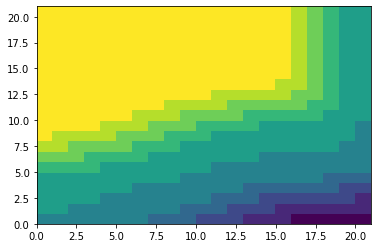

Evaluating Policy
delta : 85.68603564020907
delta : 3.1714752847367436
delta : 1.7271828795734336
delta : 0.8925619856300955
delta : 0.46072014395565475
delta : 0.23777288943625763
delta : 0.12270758411892757
delta : 0.06332515410622364
delta : 0.03267983897040949
delta : 0.01686487827464589
delta : 0.008703349233201152
Policy Improvement
[[ 0.  0.  0.  0.  0.  0. -1. -1. -2. -2. -2. -3. -3. -3. -4. -4. -4. -5.
  -5. -5. -5.]
 [ 1.  0.  0.  0.  0.  0.  0. -1. -1. -1. -2. -2. -2. -3. -3. -3. -4. -4.
  -4. -4. -4.]
 [ 1.  1.  1.  0.  0.  0.  0.  0.  0. -1. -1. -1. -2. -2. -2. -3. -3. -3.
  -3. -3. -3.]
 [ 1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0. -1. -1. -1. -2. -2. -2. -2.
  -2. -2. -2.]
 [ 1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0. -1. -1. -1. -1. -1.
  -1. -1. -1.]
 [ 1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 2.  2.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 3.  2.  2.  1.  1.  1.  1.  1.  1

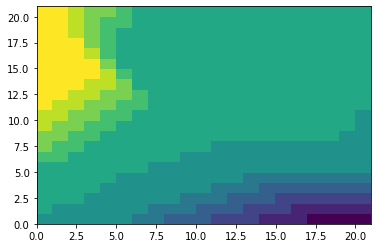

Evaluating Policy
delta : 10.173318474060693
delta : 1.42789420262136
delta : 0.4171496694874577
delta : 0.17996024841971803
delta : 0.09369112587478412
delta : 0.0484440459358666
delta : 0.02500348359507143
delta : 0.012898576463442168
Policy Improvement
[[ 0.  0.  0.  0.  0.  0.  0. -1. -2. -2. -2. -3. -3. -4. -4. -4. -5. -5.
  -5. -5. -5.]
 [ 1.  0.  0.  0.  0.  0.  0. -1. -1. -1. -2. -2. -3. -3. -3. -4. -4. -4.
  -4. -4. -4.]
 [ 1.  1.  0.  0.  0.  0.  0.  0.  0. -1. -1. -2. -2. -2. -3. -3. -3. -3.
  -3. -3. -3.]
 [ 1.  1.  1.  1.  0.  0.  0.  0.  0.  0. -1. -1. -1. -2. -2. -2. -2. -2.
  -2. -2. -2.]
 [ 1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0. -1. -1. -1. -1. -1. -1.
  -1. -1. -1.]
 [ 1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 2.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 2.  2.  2.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 3.  3.  2.  2.  1.  1.  1.  1

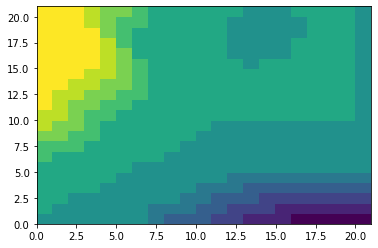

Evaluating Policy
delta : 0.8576091830362884
delta : 0.05003676493504372
delta : 0.010552691005841552
Policy Improvement
[[ 0.  0.  0.  0.  0.  0.  0. -1. -2. -2. -2. -3. -3. -4. -4. -4. -5. -5.
  -5. -5. -5.]
 [ 1.  0.  0.  0.  0.  0.  0. -1. -1. -1. -2. -2. -3. -3. -3. -4. -4. -4.
  -4. -4. -4.]
 [ 1.  1.  0.  0.  0.  0.  0.  0.  0. -1. -1. -2. -2. -2. -3. -3. -3. -3.
  -3. -3. -3.]
 [ 1.  1.  1.  1.  0.  0.  0.  0.  0.  0. -1. -1. -1. -2. -2. -2. -2. -2.
  -2. -2. -2.]
 [ 1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0. -1. -1. -1. -1. -1. -1.
  -1. -1. -1.]
 [ 1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 2.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 2.  2.  2.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 3.  3.  2.  2.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 4.  3.  3.  2.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.
   0

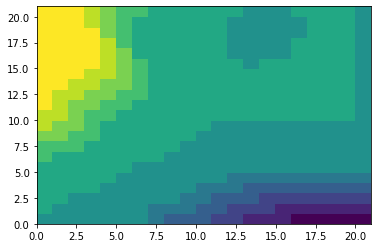

Evaluating Policy
delta : 0.02314164843699018
Policy Improvement
[[ 0.  0.  0.  0.  0.  0.  0. -1. -2. -2. -2. -3. -3. -4. -4. -4. -5. -5.
  -5. -5. -5.]
 [ 1.  0.  0.  0.  0.  0.  0. -1. -1. -1. -2. -2. -3. -3. -3. -4. -4. -4.
  -4. -4. -4.]
 [ 1.  1.  0.  0.  0.  0.  0.  0.  0. -1. -1. -2. -2. -2. -3. -3. -3. -3.
  -3. -3. -3.]
 [ 1.  1.  1.  1.  0.  0.  0.  0.  0.  0. -1. -1. -1. -2. -2. -2. -2. -2.
  -2. -2. -2.]
 [ 1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0. -1. -1. -1. -1. -1. -1.
  -1. -1. -1.]
 [ 1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 2.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 2.  2.  2.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 3.  3.  2.  2.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 4.  3.  3.  2.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 4.  4.  3.  2.  2.  1.  1.  1.  1.  1.  1.

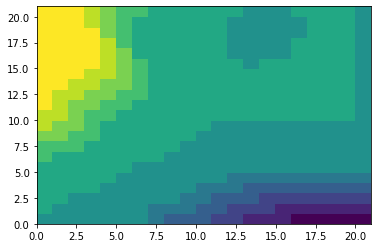

In [131]:
v_s = np.zeros((MAX_CARS+1,MAX_CARS+1))
pi = np.zeros((MAX_CARS+1,MAX_CARS+1))
actions = np.arange(-MAX_CAR_MOVE,MAX_CAR_MOVE+1)

while(1):
    #Policy evaluation
    print("Evaluating Policy")
    counter=0
    while(1):
        delta = 0
        for c1 in range(MAX_CARS+1):
            for c2 in range(MAX_CARS+1):
                action = pi[c1][c2]
                val = calcReward(c1,c2,v_s,action,poissondistr)
                delta = max(delta,abs(val-v_s[c1][c2]))
                v_s[c1][c2] = val    
        if(counter%3==0):
            print("delta : " + str(delta))
        counter+=1
        if(delta<theta):
            break
    # Policy improvement
    print("Policy Improvement")
    stable = True
    for c1 in range(MAX_CARS+1):
        for c2 in range(MAX_CARS+1):
            values = np.zeros(len(actions))
            i=0
            for action in actions:
                values[i] = calcReward(c1,c2,v_s,action,poissondistr)
                i+=1
            bestaction = actions[np.argmax(values)]
            if(pi[c1][c2]!=bestaction):
                stable=False
                pi[c1][c2] = bestaction
    print(pi)
    plt.pcolor(pi)
    plt.show()
    if(stable==True):
        break


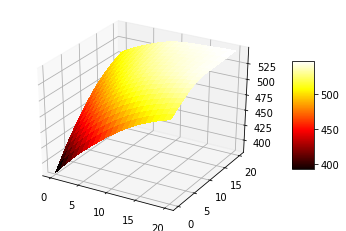

In [133]:
# SOURCE - https://stackoverflow.com/questions/11766536/matplotlib-3d-surface-from-a-rectangular-array-of-heights

from mpl_toolkits.mplot3d import Axes3D

X = np.arange(0,MAX_CARS+1)
Y = np.arange(0,MAX_CARS+1)
X, Y = np.meshgrid(X, Y)

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, v_s, rstride=1, cstride=1, cmap='hot', linewidth=0, antialiased=False)


fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()